In [1]:
import pandas as pd
# Seaborn visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree, metrics
import graphviz
from sklearn.metrics import plot_confusion_matrix
from sklearn import neighbors
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
data = pd.read_csv('evaluation.csv')
data

,car_price,car_maintenance_cost,car_doors,car_capacity,car_luggage_capacity,car_safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
data.iloc[:,4:6]

,car_luggage_capacity,car_safety
0,small,low
1,small,med
2,small,high
3,med,low
4,med,med
...,...,...
1723,med,med
1724,med,high
1725,big,low
1726,big,med


## Provide data insights

#### Do following

[link text](https://)1. Provide statistical information of all columns (counts, unique, frequency)
2. Check for null
3. plot pairplot of columns <br>
> Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.
4. Provide pie-chart of each column

In [4]:
#1
data.describe()

,car_price,car_maintenance_cost,car_doors,car_capacity,car_luggage_capacity,car_safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,more,big,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
#2
data.isna().sum()

car_price               0
car_maintenance_cost    0
car_doors               0
car_capacity            0
car_luggage_capacity    0
car_safety              0
decision                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car_price             1728 non-null   object
 1   car_maintenance_cost  1728 non-null   object
 2   car_doors             1728 non-null   object
 3   car_capacity          1728 non-null   object
 4   car_luggage_capacity  1728 non-null   object
 5   car_safety            1728 non-null   object
 6   decision              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
#Label encode all the features
le = preprocessing.LabelEncoder()

for i in range(data.shape[1]-1):
    le.fit(data.iloc[:, i])
    print(le.classes_)
    data.iloc[:, i] = le.transform(data.iloc[:, i])

['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car_price             1728 non-null   int64 
 1   car_maintenance_cost  1728 non-null   int64 
 2   car_doors             1728 non-null   int64 
 3   car_capacity          1728 non-null   int64 
 4   car_luggage_capacity  1728 non-null   int64 
 5   car_safety            1728 non-null   int64 
 6   decision              1728 non-null   object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


/home/014544907/anaconda3/envs/pytorch/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


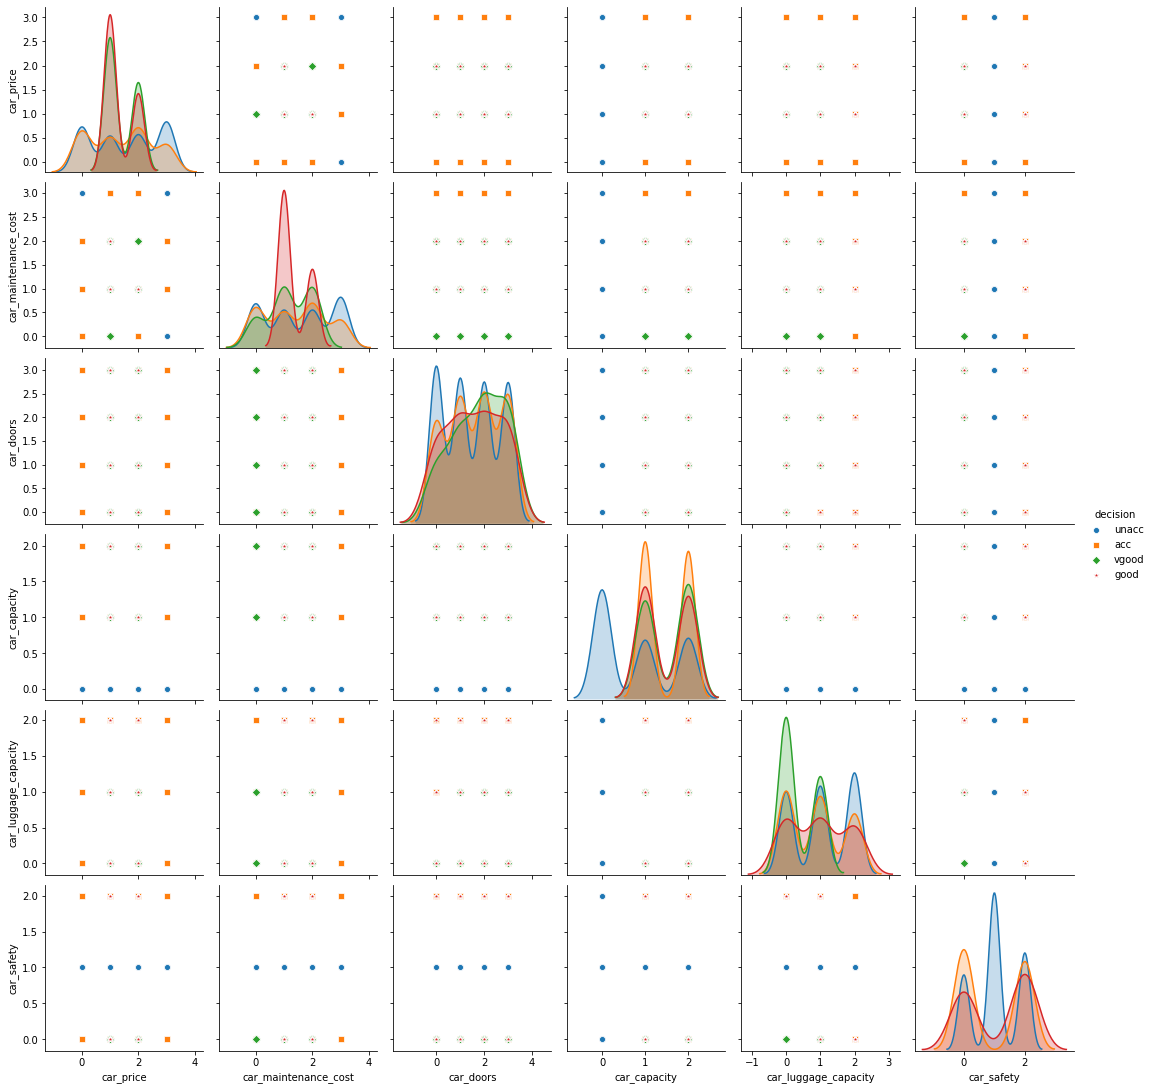

In [9]:
#3
#Pairplot
sns.pairplot(data = data,hue="decision", markers=["o", "s", "D","*"])

/home/014544907/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


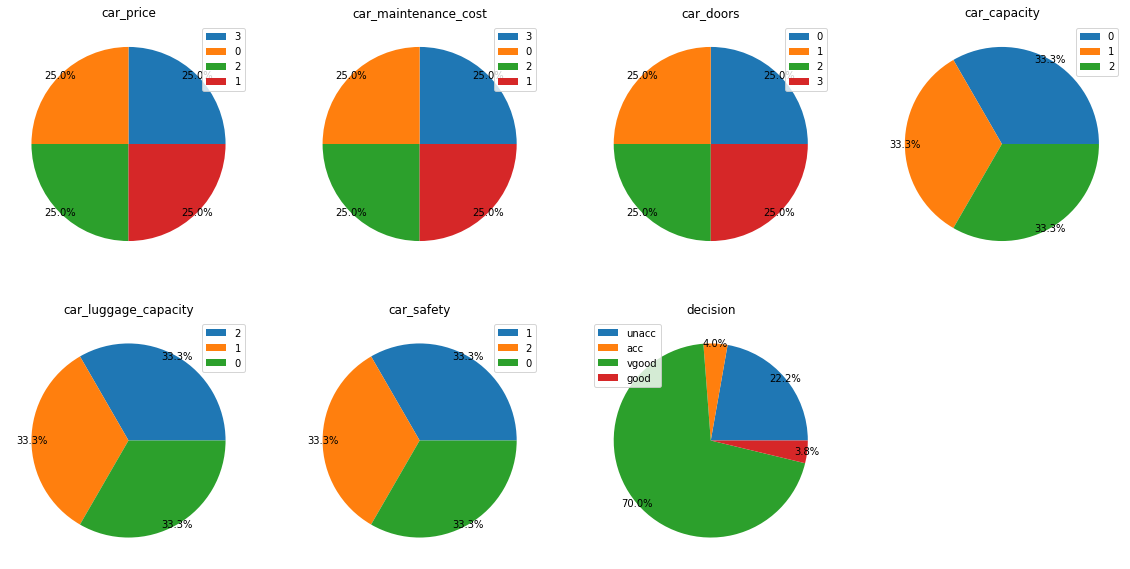

In [10]:
#4
#define subplot size 
fig, ax = plt.subplots(2,4, figsize=(20,10))
#delete unwanted axes
fig.delaxes(ax[1,3]) 
#store column names
col = data.columns
for i, ax in enumerate(ax.flatten()):
    if i < 7:
        #group each column by unique value and plot pie
        x = data.groupby(col[i]).size()
        patches,text, _ =ax.pie(x, autopct="%.1f%%", pctdistance=1, textprops={'fontsize': 10})
        ax.legend(patches,labels=data.iloc[:, i].unique(),loc=0)
        ax.title.set_text(col[i])
        
plt.show()

## Data Preprocessing

In [11]:
x = data.iloc[:,:6]
y = data.iloc[:, 6]

In [12]:
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [13]:
# Splitting the dataset into train and test sets (test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=data['decision'])

In [14]:
y_test

1117      acc
353     unacc
1391      acc
413     unacc
142     unacc
        ...  
1220    unacc
1243    unacc
1109    unacc
1376      acc
958       acc
Name: decision, Length: 346, dtype: object

In [15]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[-1.35084954,  0.4488992 , -0.45111079, -1.22144075,  1.21988882,
         1.23253382],
       [-1.35084954,  0.4488992 ,  1.31249633,  1.23387724, -1.22342473,
         1.23253382],
       [-1.35084954,  1.33769388,  1.31249633,  0.00621824, -1.22342473,
        -1.22011088],
       ...,
       [-1.35084954,  1.33769388, -0.45111079,  0.00621824,  1.21988882,
         0.00621147],
       [ 0.4220603 , -1.32869017, -0.45111079,  0.00621824, -0.00176795,
         1.23253382],
       [-0.46439462, -1.32869017,  0.43069277,  1.23387724, -0.00176795,
         1.23253382]])

## Modeling

Perform following task for both `Decision tree` and `KNN`
1. create a model
2. feed training data into the model
3. predict values for your test data
4. visualize classifier
4. find the training and testing accuracy
5. print confusion matrix

NOTE: 
> 1. Use sklearn's DecisionTreeClassifier <br>
> 2. Visualize your decision trees using any (Scikit-learn, Graphviz, Matplotlib) library

### `Decision Tree Classifier`

#### 1. Decision Trees with max_depth = 2

In [17]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# use the model to make predictions with the test data/train data
y_pred = dtree.predict(X_test)
tr_pred = dtree.predict(X_train)

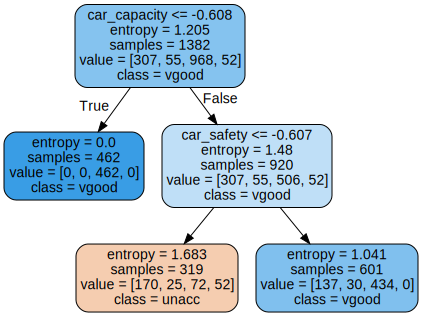

In [19]:
#Visualize classifier
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=data.decision.unique())
graph = graphviz.Source(dot_data)  
graph

In [20]:
#find number of misclassified samples
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
train_accuracy_2 = metrics.accuracy_score(y_train, tr_pred)
test_accuracy_2 = metrics.accuracy_score(y_test, y_pred)
print('Training Accuracy: {:.2f}'.format(train_accuracy_2))
print('Testing Accuracy: {:.2f}'.format(test_accuracy_2))

Misclassified samples: 83
Training Accuracy: 0.77
Testing Accuracy: 0.76


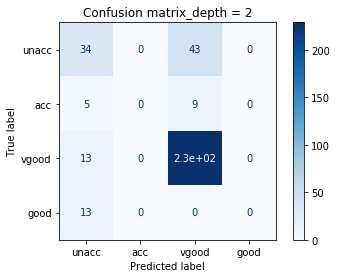

In [21]:
#plot confusion matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=data.decision.unique(),cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix_depth = 2')
plt.show()

#### 2. Decision Trees with max_depth = 4

In [22]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# use the model to make predictions with the test data/train data
y_pred = dtree.predict(X_test)
tr_pred = dtree.predict(X_train)

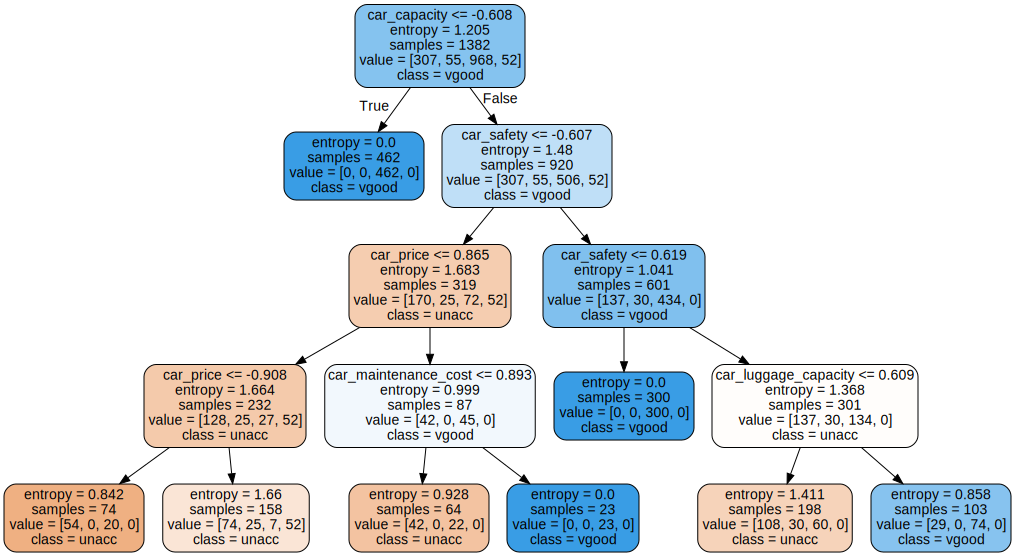

In [24]:
#Visualize classifier
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=data.decision.unique())
graph = graphviz.Source(dot_data)  
graph

In [25]:
#find number of misclassified samples
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
train_accuracy_4 = metrics.accuracy_score(y_train, tr_pred)
test_accuracy_4 = metrics.accuracy_score(y_test, y_pred)
print('Training Accuracy: {:.2f}'.format(train_accuracy_4))
print('Testing Accuracy: {:.2f}'.format(test_accuracy_4))

Misclassified samples: 57
Training Accuracy: 0.82
Testing Accuracy: 0.84


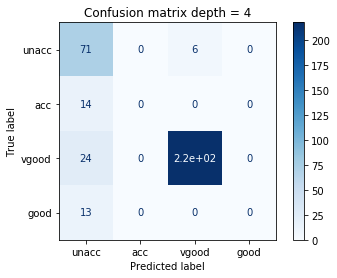

In [26]:
#plot confusion matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=data.decision.unique(),cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix depth = 4')
plt.show()

#### 3. Decision Trees with max_depth = 6

In [27]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
# use the model to make predictions with the test data/train data
y_pred = dtree.predict(X_test)
tr_pred = dtree.predict(X_train)

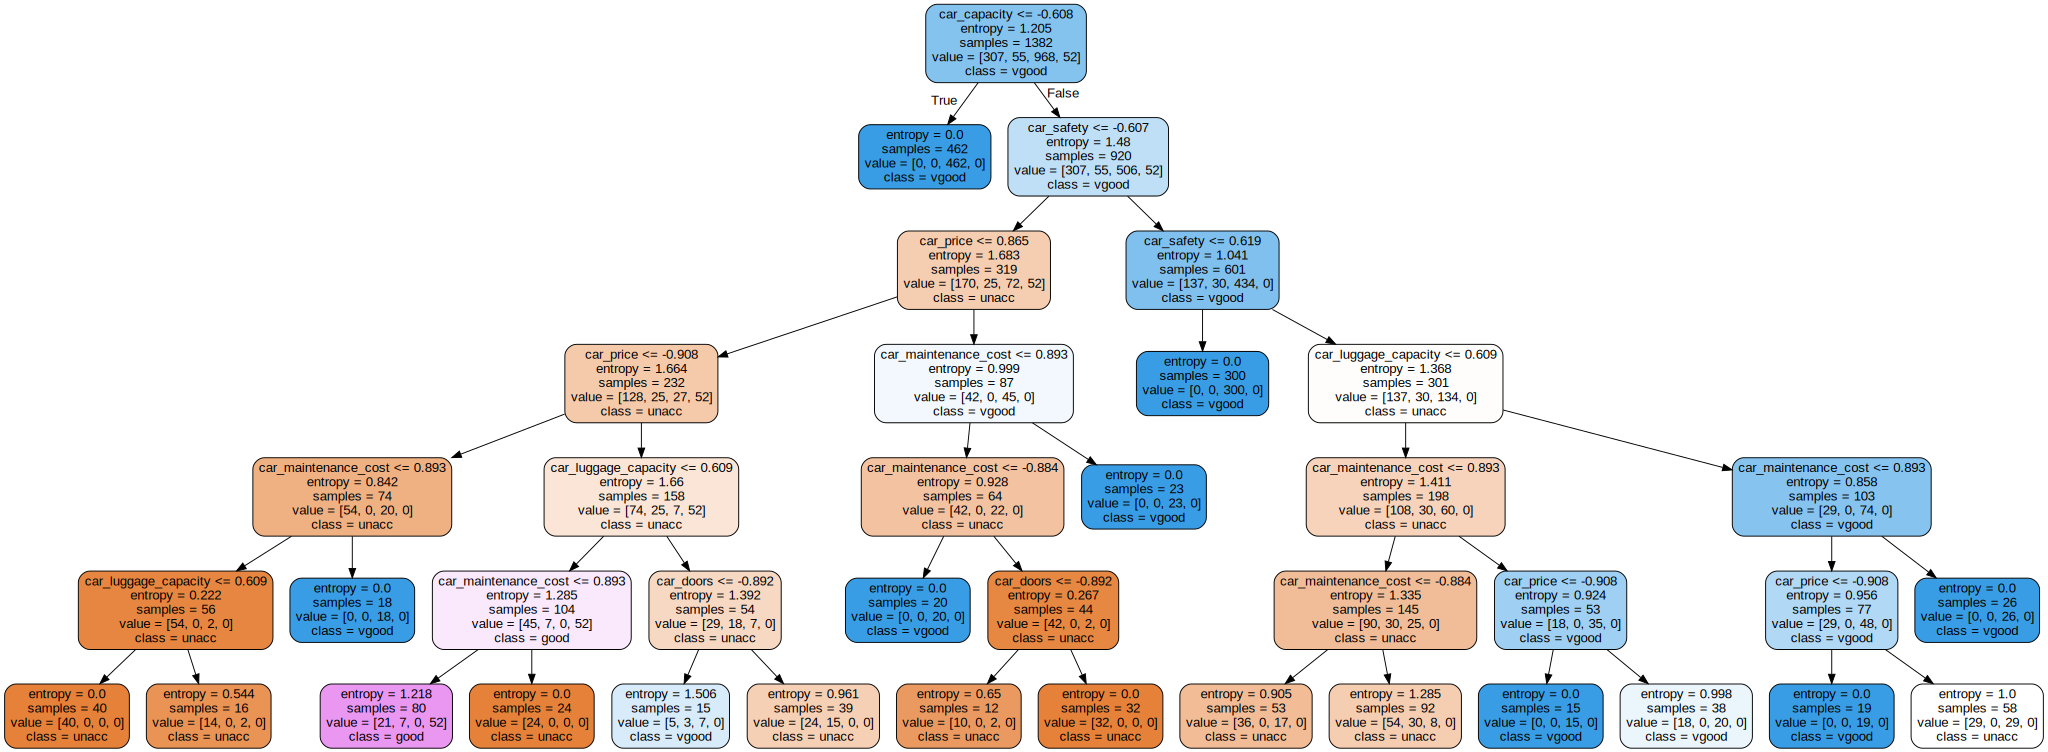

In [29]:
#Visualize classifier
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=data.decision.unique())
graph = graphviz.Source(dot_data)  
graph

In [30]:
#find number of misclassified samples
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
train_accuracy_6 = metrics.accuracy_score(y_train, tr_pred)
test_accuracy_6 = metrics.accuracy_score(y_test, y_pred)
print('Training Accuracy: {:.2f}'.format(train_accuracy_6))
print('Testing Accuracy: {:.2f}'.format(test_accuracy_6))

Misclassified samples: 41
Training Accuracy: 0.89
Testing Accuracy: 0.88


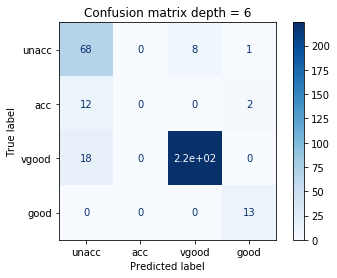

In [31]:
#plot confusion matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=data.decision.unique(),cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix depth = 6')
plt.show()

#### 4. Decision Trees with max_depth = 8

In [32]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# use the model to make predictions with the test data/train data
y_pred = dtree.predict(X_test)
tr_pred = dtree.predict(X_train)

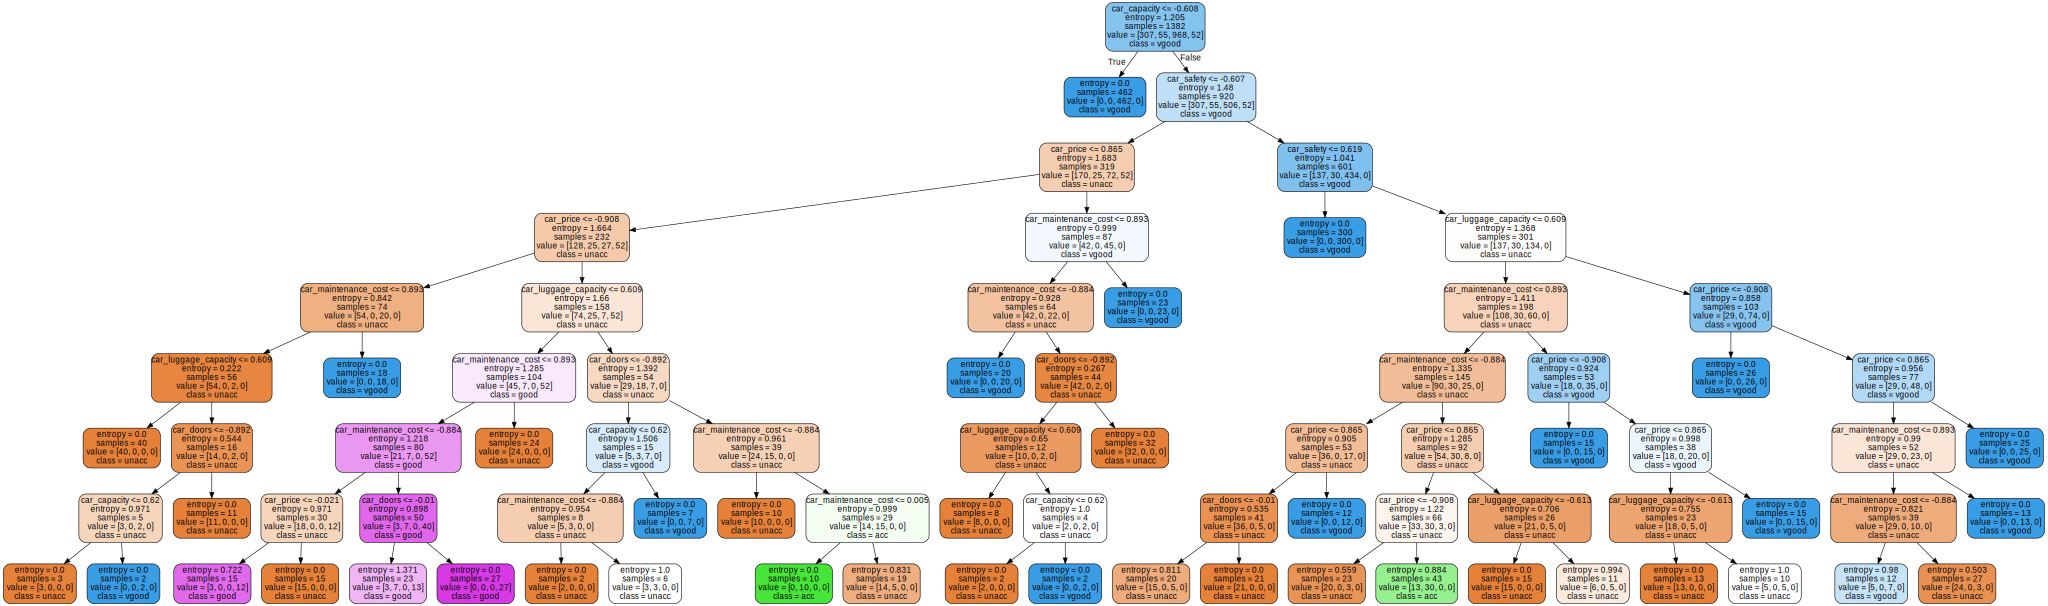

In [34]:
#Visualize classifier
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=data.decision.unique())
graph = graphviz.Source(dot_data)  
graph

In [35]:
#find number of misclassified samples
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
train_accuracy_8 = metrics.accuracy_score(y_train, tr_pred)
test_accuracy_8 = metrics.accuracy_score(y_test, y_pred)
print('Training Accuracy: {:.2f}'.format(train_accuracy_8))
print('Testing Accuracy: {:.2f}'.format(test_accuracy_8))

Misclassified samples: 24
Training Accuracy: 0.96
Testing Accuracy: 0.93


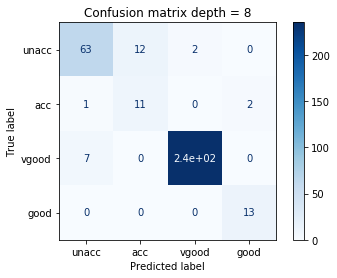

In [36]:
#plot confusion matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=data.decision.unique(),cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix depth = 8')
plt.show()

#### 5. Decision Trees with max_depth = 10

In [37]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
# use the model to make predictions with the test data/train data
y_pred = dtree.predict(X_test)
tr_pred = dtree.predict(X_train)

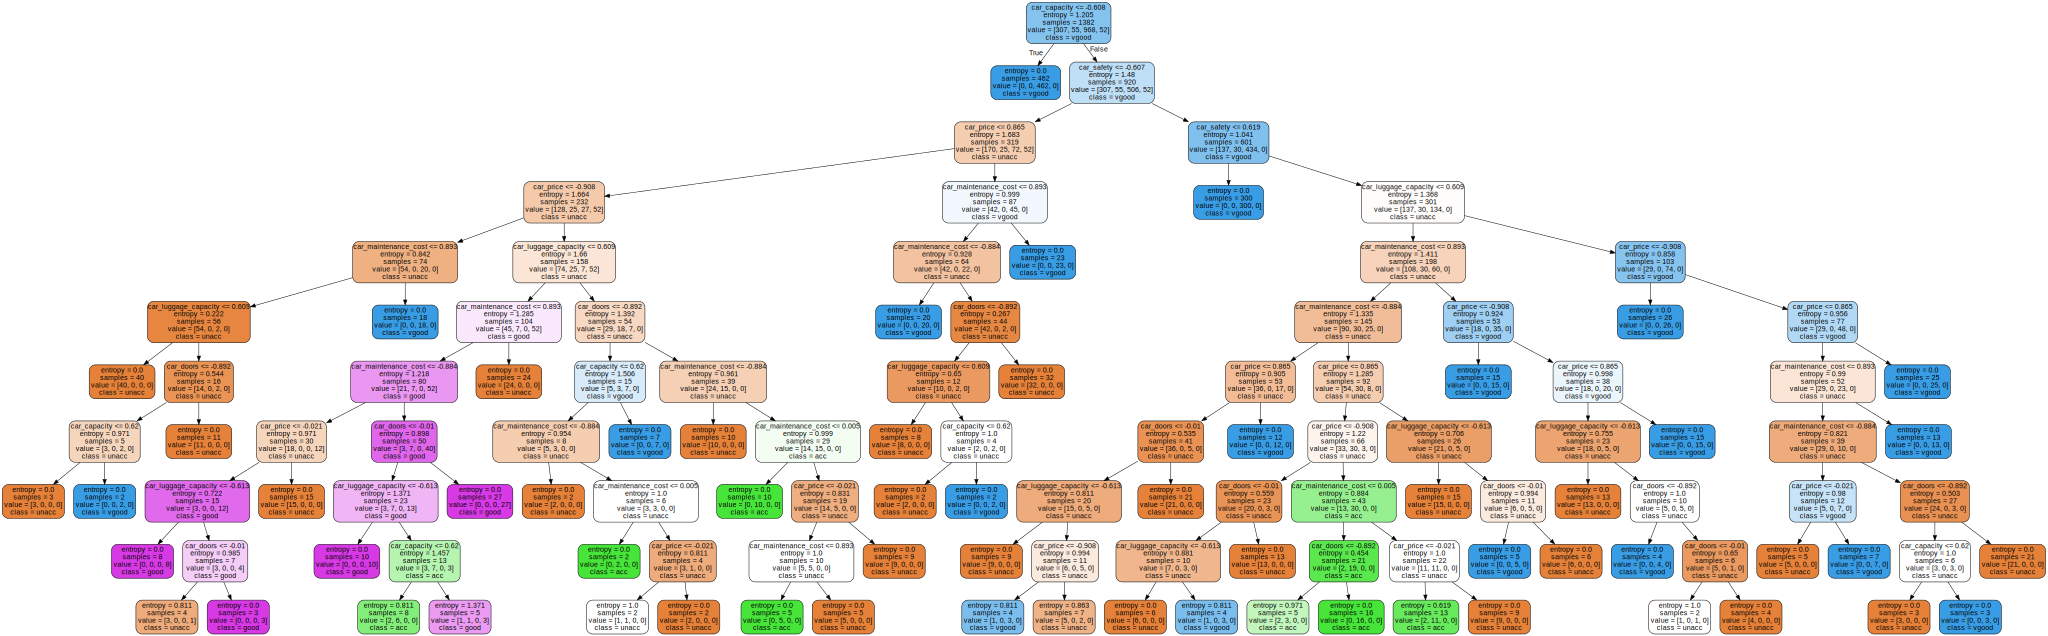

In [39]:
#Visualize classifier
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=data.decision.unique())
graph = graphviz.Source(dot_data)  
graph

In [40]:
#find number of misclassified samples
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
train_accuracy_10 = metrics.accuracy_score(y_train, tr_pred)
test_accuracy_10 = metrics.accuracy_score(y_test, y_pred)
print('Training Accuracy: {:.2f}'.format(train_accuracy_10))
print('Testing Accuracy: {:.2f}'.format(test_accuracy_10))

Misclassified samples: 13
Training Accuracy: 0.99
Testing Accuracy: 0.96


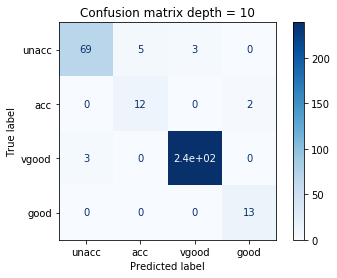

In [41]:
#plot confusion matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=data.decision.unique(),cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix depth = 10')
plt.show()

#### 6. Decision Trees with max_depth = 12

In [42]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
# use the model to make predictions with the test data/train data
y_pred = dtree.predict(X_test)
tr_pred = dtree.predict(X_train)

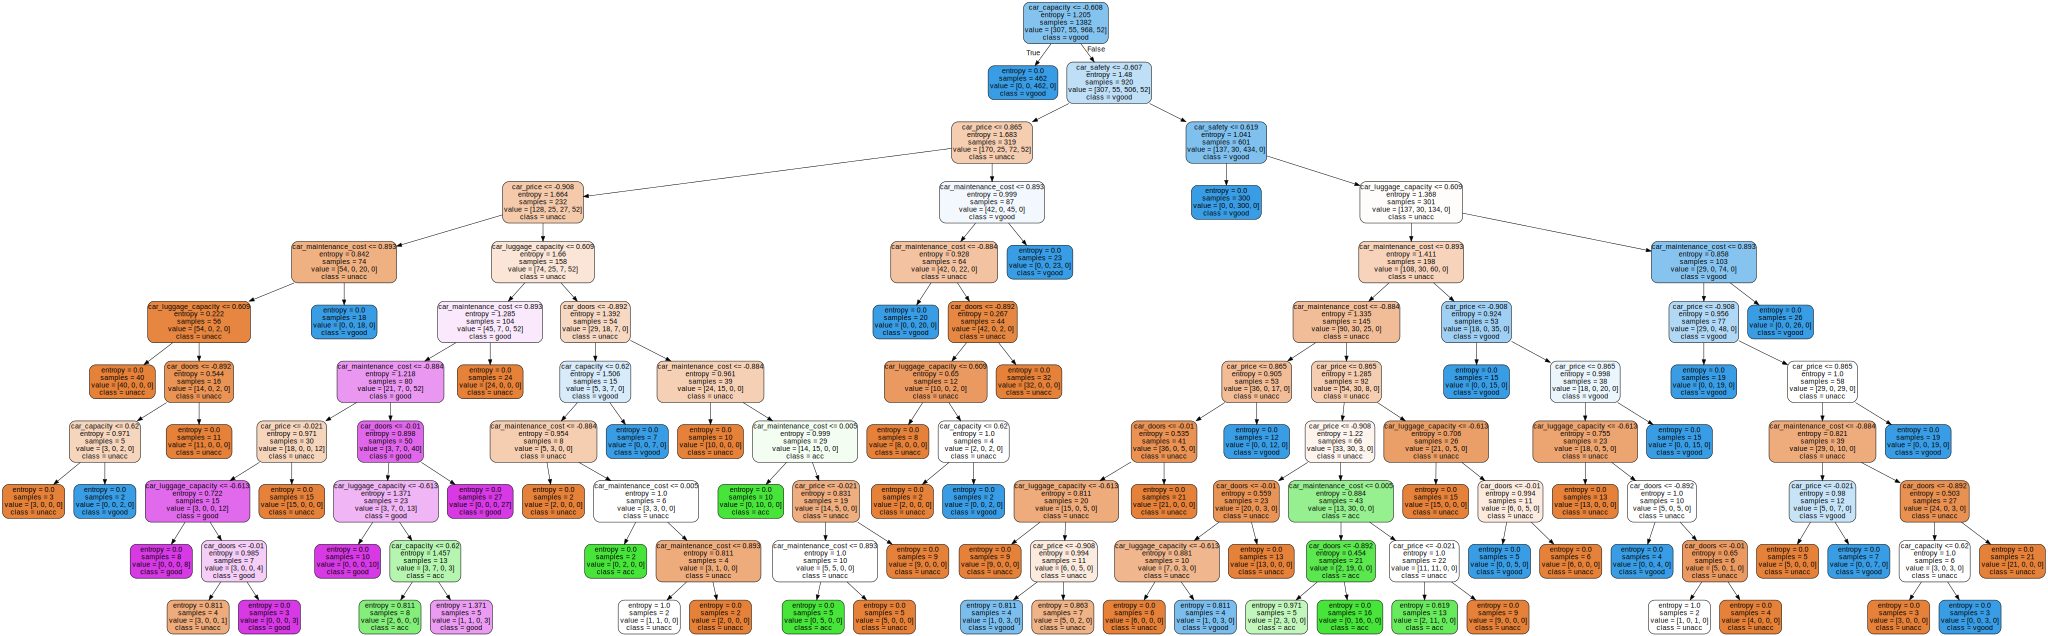

In [44]:
#Visualize classifier
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=data.decision.unique())
graph = graphviz.Source(dot_data)  
graph

In [45]:
#find number of misclassified samples
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
train_accuracy_12 = metrics.accuracy_score(y_train, tr_pred)
test_accuracy_12 = metrics.accuracy_score(y_test, y_pred)
print('Training Accuracy: {:.2f}'.format(train_accuracy_12))
print('Testing Accuracy: {:.2f}'.format(test_accuracy_12))

Misclassified samples: 13
Training Accuracy: 0.99
Testing Accuracy: 0.96


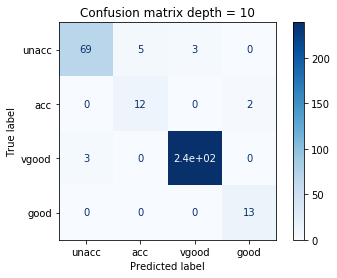

In [46]:
#plot confusion matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=data.decision.unique(),cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix depth = 10')
plt.show()

#### plot the graph for performance (accuracy) of decision trees with different max_depth values
max_depth = [2, 4, 6, 8, 10, 12]

In [47]:
#Depth vs performance
max_depth = [2, 4, 6, 8, 10, 12]
trai_perf = [train_accuracy_2,train_accuracy_4,train_accuracy_6,train_accuracy_8,train_accuracy_10,train_accuracy_12]
test_perf = [test_accuracy_2,test_accuracy_4,test_accuracy_6,test_accuracy_8,test_accuracy_10,test_accuracy_12]


In [48]:
test_perf

[0.7601156069364162,
 0.8352601156069365,
 0.8815028901734104,
 0.930635838150289,
 0.9624277456647399,
 0.9624277456647399]

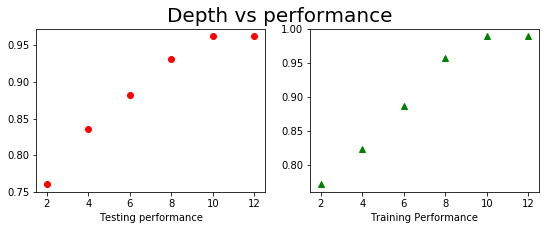

In [49]:
#define subplot size 
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.suptitle('Depth vs performance', fontsize=20)
plt.plot([max_depth], [test_perf],'ro')
plt.xlabel('Testing performance')
plt.subplot(122)
plt.plot([max_depth], [trai_perf],'g^')
plt.xlabel('Training Performance')
        
plt.show()

### Decision Tree Findings : As the depth of the tree increases, performance is better

### `KNN Classifiers`

NOTE: 
> 1. Use sklearn's KNeighborsClassifier
> 2. Visualize your KNN using any(Scikit-learn, Matplotlib) library

In [50]:
#reduce no.of features to 2 using pca to make it easier for plotting classifier
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

In [51]:
#encode labels 
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

#### 1. n_neighbors = 1

In [52]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [53]:
# use the model to make predictions with the test data
y_pred = knn.predict(X_test)
tr_pred = knn.predict(X_train)

In [54]:
#No.of mislabeled data
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
test_accuracy_1 = metrics.accuracy_score(y_test, y_pred)
train_accuracy_1 = metrics.accuracy_score(y_train, tr_pred)
print('Train Accuracy: {:.2f}'.format(train_accuracy_1))
print('Test Accuracy: {:.2f}'.format(test_accuracy_1))

Misclassified samples: 198
Train Accuracy: 1.00
Test Accuracy: 0.43


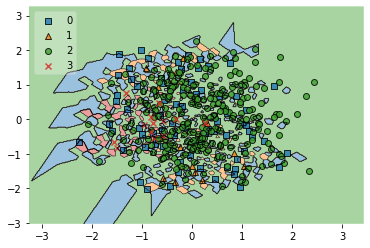

In [55]:
# Plotting decision region
plot_decision_regions(X_test, y_test, clf=knn, legend=2)

#### 2. n_neighbors = 2

In [56]:
knn_2 = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [57]:
# use the model to make predictions with the test data
y_pred = knn_2.predict(X_test)
tr_pred = knn_2.predict(X_train)

In [58]:
#No.of mislabeled data
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
test_accuracy_2 = metrics.accuracy_score(y_test, y_pred)
train_accuracy_2 = metrics.accuracy_score(y_train, tr_pred)
print('Train Accuracy: {:.2f}'.format(train_accuracy_2))
print('Test Accuracy: {:.2f}'.format(test_accuracy_2))

Misclassified samples: 223
Train Accuracy: 0.72
Test Accuracy: 0.36


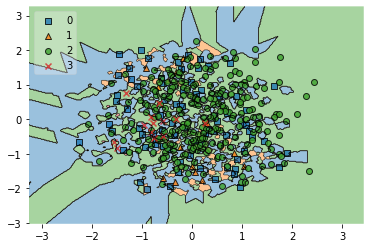

In [59]:
# Plotting decision region
plot_decision_regions(X_test, y_test, clf=knn_2, legend=2)

#### 3. n_neighbors = 3

In [60]:
knn_3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = knn_3.predict(X_test)
tr_pred = knn_3.predict(X_train)

In [61]:
#No.of mislabeled data
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
test_accuracy_3 = metrics.accuracy_score(y_test, y_pred)
train_accuracy_3 = metrics.accuracy_score(y_train, tr_pred)
print('Train Accuracy: {:.2f}'.format(train_accuracy_3))
print('Test Accuracy: {:.2f}'.format(test_accuracy_3))

Misclassified samples: 170
Train Accuracy: 0.71
Test Accuracy: 0.51


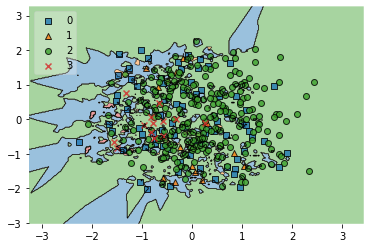

In [62]:
# Plotting decision region
plot_decision_regions(X_test, y_test, clf=knn_3, legend=2)

#### 4. n_neighbors = 4

In [63]:
knn_4 = neighbors.KNeighborsClassifier(n_neighbors = 4)
knn_4.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = knn_4.predict(X_test)
tr_pred = knn_4.predict(X_train)

In [64]:
#No.of mislabeled data
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
test_accuracy_4 = metrics.accuracy_score(y_test, y_pred)
train_accuracy_4 = metrics.accuracy_score(y_train, tr_pred)
print('Train Accuracy: {:.2f}'.format(train_accuracy_4))
print('Test Accuracy: {:.2f}'.format(test_accuracy_4))

Misclassified samples: 159
Train Accuracy: 0.69
Test Accuracy: 0.54


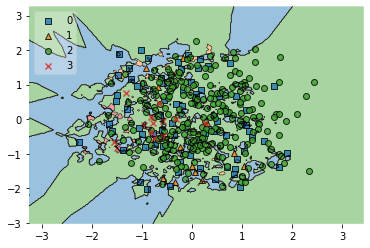

In [65]:
# Plotting decision region
plot_decision_regions(X_test, y_test, clf=knn_4, legend=2)

#### plot the graph for performance (accuracy) of KNN with different neighbours values
n_neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [66]:
te_acc = []
tr_acc = []
n_neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in n_neighbours:
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    tr_pred = knn.predict(X_train)
    tr_accuracy = metrics.accuracy_score(y_train, tr_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    te_acc.append(accuracy)
    tr_acc.append(tr_accuracy)

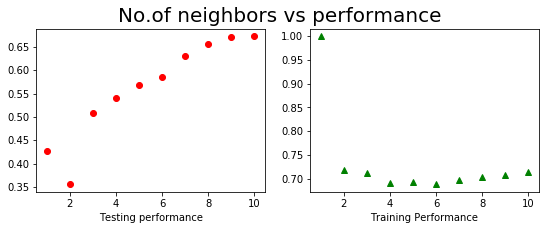

In [67]:
#define subplot size 
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.suptitle('No.of neighbors vs performance', fontsize=20)
plt.plot([n_neighbours], [te_acc],'ro')
plt.xlabel('Testing performance')
plt.subplot(122)
plt.plot([n_neighbours], [tr_acc],'g^')
plt.xlabel('Training Performance')
        
plt.show()

### KNN Findings : Since there are 6 features in the dataset, I have used PCA to reduce the dimension to 2, So the knn classifier shows high testing accuracy as the number of neighbors increase, But the training accuracy drops as the number of neighbor increases.